In [1]:
import math,copy
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision = 2)
plt.style.use('dark_background')

In [2]:
arr = np.array([1,2,3,4])
cst = np.zeros_like(arr)

In [3]:
cst

array([0, 0, 0, 0])

In [4]:
X_train = np.array([1.0,2.0])
Y_train = np.array([300.0,500.0])

In [5]:
w_range = np.array([0,400])
tmp_b = 100
w_array = np.arange(*w_range,5)
w_array

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320,
       325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385,
       390, 395])

In [6]:
from lab_utils_common import compute_cost

In [7]:
cost = np.zeros_like(w_array)
for i in range(len(w_array)):
    tmp_w = w_array[i]
    cost[i] = compute_cost(X_train,Y_train,tmp_w,tmp_b)

In [8]:
cost

array([50000, 47531, 45125, 42781, 40500, 38281, 36125, 34031, 32000,
       30031, 28125, 26281, 24500, 22781, 21125, 19531, 18000, 16531,
       15125, 13781, 12500, 11281, 10125,  9031,  8000,  7031,  6125,
        5281,  4500,  3781,  3125,  2531,  2000,  1531,  1125,   781,
         500,   281,   125,    31,     0,    31,   125,   281,   500,
         781,  1125,  1531,  2000,  2531,  3125,  3781,  4500,  5281,
        6125,  7031,  8000,  9031, 10125, 11281, 12500, 13781, 15125,
       16531, 18000, 19531, 21125, 22781, 24500, 26281, 28125, 30031,
       32000, 34031, 36125, 38281, 40500, 42781, 45125, 47531])

In [9]:
X_train = np.array([[2104,5,1,45],[1416,3,2,40],[852,2,1,35]])
y_train = np.array([460,282,178])

In [10]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

In [11]:
def predict_single_loop(X,y,w,b):
    n = X.shape[0]
    p = 0
    for i in range(n):
        p += X[i] * w[i]
    p += b
    return p

In [12]:
x_vec = X_train[0]
f_wb = predict_single_loop(x_vec,y_train,w_init,b_init)
f_wb

459.9999976194083

In [13]:
x_vec = X_train[0]
f_wb = np.dot(x_vec,w_init) + b_init
f_wb

459.9999976194083

In [14]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(x[i],w) + b
        cost = cost + (f_wb_i - y[i])**2
    total_cost = cost / (2 * m)
    return total_cost

In [15]:
cost = compute_cost(X_train,y_train,w_init,b_init)
print(f"cost at optimal w: {cost:2f}")

cost at optimal w: 416.666694


In [16]:
def compute_gradient(x,y,w,b):
    m,n = x.shape
    dj_dw = np.zeros_like(w)
    dj_db = 0.
    for i in range(m):
        f_wb = np.dot(x[i],w) + b
        err = f_wb - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + (err * x[i,j])
        dj_db += err
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw,dj_db

In [17]:
tmp_dj_dw,tmp_dj_db = compute_gradient(X_train,y_train,w_init,b_init)
print(f"dj_dw: {tmp_dj_dw}")
print(f"dj_db: {tmp_dj_db}")

dj_dw: [-23600.      -50.      -33.33   -666.67]
dj_db: -16.66666834059178


In [18]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = np.zeros_like(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw,dj_db = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost {J_history[-1]}   ")
        
    return w, b, J_history

In [19]:
initial_w = w_init
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration 0: Cost 2105.0878366551265   
Iteration 100: Cost 88.81874522742669   
Iteration 200: Cost 88.53081395598822   
Iteration 300: Cost 88.24542022306088   
Iteration 400: Cost 87.96254156151308   
Iteration 500: Cost 87.68215570313492   
Iteration 600: Cost 87.40424057688176   
Iteration 700: Cost 87.12877430712626   
Iteration 800: Cost 86.85573521192713   
Iteration 900: Cost 86.58510180131645   
b,w found by gradient descent: -0.00,[ 0.21  0.   -0.   -0.03] 
prediction: 446.71, target value: 460
prediction: 300.32, target value: 282
prediction: 180.36, target value: 178


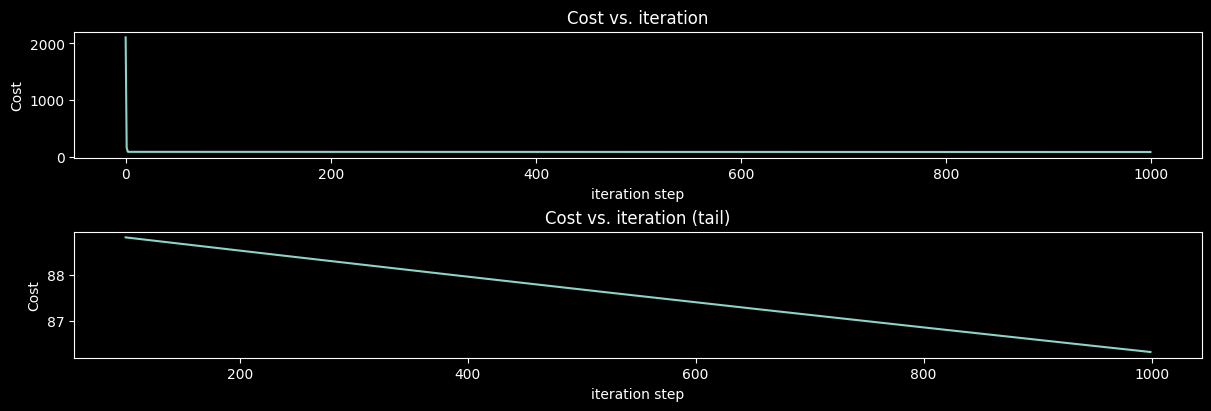

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()